# **Workout Classification - Tensorflow**

In [1]:
#@title Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Download Data

In [2]:
# Upload first your data before execute these code below
path_workout = "/content/data_skripsi/squat20min.csv"; # change this
path_other = "/content/data_skripsi/dance.csv"; # change this
name_class = "squat" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [3]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [4]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,930.254394,327.058718,948.669144,311.885982,912.827892,311.805550,971.157245,324.328566,890.956323,325.245492,...,876.581482,584.425787,1035.203916,748.487022,808.191448,764.342692,1037.994203,922.051037,812.277639,927.446830
1,932.030521,394.995859,948.973925,378.496055,913.015521,378.656100,967.758838,390.670501,890.428117,393.531370,...,880.580289,618.660424,1047.376916,741.781878,801.580525,761.643032,1039.428334,923.938391,815.592839,932.768244
2,932.360935,428.795461,949.252266,412.196890,914.325810,411.569597,969.342540,418.977190,891.268397,422.255179,...,881.147326,637.718284,1046.877823,754.864970,799.962679,764.672557,1039.547260,927.145722,816.414550,930.478882
3,930.910876,451.792742,947.893106,436.159813,914.045886,435.872518,969.096918,446.896930,892.342100,448.183724,...,883.802555,658.175182,1050.955902,753.705076,800.354076,767.253926,1040.040215,925.821326,819.226365,930.341134
4,930.990394,473.245640,947.811298,456.843977,912.849860,457.170681,968.982258,470.540201,891.104335,472.238457,...,883.137205,680.871395,1055.213111,756.600794,800.510774,769.240514,1039.456324,924.579760,819.502067,928.505602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25125,897.352239,298.335385,911.123169,285.332392,882.637560,282.955055,909.611402,285.051123,851.682569,279.396996,...,831.388441,573.772092,941.889288,738.082349,816.896820,752.925832,944.484203,894.379703,790.418385,908.929315
25126,897.064978,293.553175,910.642709,280.299306,881.415580,278.560084,908.943424,280.807556,850.767355,277.695184,...,832.055715,572.672929,940.736601,737.313236,817.052231,752.702569,945.211168,894.148730,790.163151,907.243876
25127,896.569026,294.724947,910.225545,281.435557,881.552901,279.208158,909.120639,279.625292,849.997289,277.591159,...,832.746917,573.058084,939.916104,739.908616,816.946061,752.581580,945.251179,894.417163,791.160780,909.639497
25128,894.784333,295.619902,905.366140,281.418456,878.095519,278.802959,909.328585,278.098575,848.428730,277.450343,...,833.273473,572.873083,940.177153,739.650236,817.209655,751.762446,945.237014,894.659789,789.950456,910.172541


In [5]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,269.258930,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,283.946620,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,284.025786,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,366.079301,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,371.239109,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


Data Preparation

In [6]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,930.254394,327.058718,948.669144,311.885982,912.827892,311.805550,971.157245,324.328566,890.956323,325.245492,...,584.425787,1035.203916,748.487022,808.191448,764.342692,1037.994203,922.051037,812.277639,927.446830,squat
1,932.030521,394.995859,948.973925,378.496055,913.015521,378.656100,967.758838,390.670501,890.428117,393.531370,...,618.660424,1047.376916,741.781878,801.580525,761.643032,1039.428334,923.938391,815.592839,932.768244,squat
2,932.360935,428.795461,949.252266,412.196890,914.325810,411.569597,969.342540,418.977190,891.268397,422.255179,...,637.718284,1046.877823,754.864970,799.962679,764.672557,1039.547260,927.145722,816.414550,930.478882,squat
3,930.910876,451.792742,947.893106,436.159813,914.045886,435.872518,969.096918,446.896930,892.342100,448.183724,...,658.175182,1050.955902,753.705076,800.354076,767.253926,1040.040215,925.821326,819.226365,930.341134,squat
4,930.990394,473.245640,947.811298,456.843977,912.849860,457.170681,968.982258,470.540201,891.104335,472.238457,...,680.871395,1055.213111,756.600794,800.510774,769.240514,1039.456324,924.579760,819.502067,928.505602,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25125,897.352239,298.335385,911.123169,285.332392,882.637560,282.955055,909.611402,285.051123,851.682569,279.396996,...,573.772092,941.889288,738.082349,816.896820,752.925832,944.484203,894.379703,790.418385,908.929315,squat
25126,897.064978,293.553175,910.642709,280.299306,881.415580,278.560084,908.943424,280.807556,850.767355,277.695184,...,572.672929,940.736601,737.313236,817.052231,752.702569,945.211168,894.148730,790.163151,907.243876,squat
25127,896.569026,294.724947,910.225545,281.435557,881.552901,279.208158,909.120639,279.625292,849.997289,277.591159,...,573.058084,939.916104,739.908616,816.946061,752.581580,945.251179,894.417163,791.160780,909.639497,squat
25128,894.784333,295.619902,905.366140,281.418456,878.095519,278.802959,909.328585,278.098575,848.428730,277.450343,...,572.873083,940.177153,739.650236,817.209655,751.762446,945.237014,894.659789,789.950456,910.172541,squat


In [7]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605,other
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232,other
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373,other
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105,other
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [8]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,930.254394,327.058718,948.669144,311.885982,912.827892,311.805550,971.157245,324.328566,890.956323,325.245492,...,584.425787,1035.203916,748.487022,808.191448,764.342692,1037.994203,922.051037,812.277639,927.446830,squat
1,932.030521,394.995859,948.973925,378.496055,913.015521,378.656100,967.758838,390.670501,890.428117,393.531370,...,618.660424,1047.376916,741.781878,801.580525,761.643032,1039.428334,923.938391,815.592839,932.768244,squat
2,932.360935,428.795461,949.252266,412.196890,914.325810,411.569597,969.342540,418.977190,891.268397,422.255179,...,637.718284,1046.877823,754.864970,799.962679,764.672557,1039.547260,927.145722,816.414550,930.478882,squat
3,930.910876,451.792742,947.893106,436.159813,914.045886,435.872518,969.096918,446.896930,892.342100,448.183724,...,658.175182,1050.955902,753.705076,800.354076,767.253926,1040.040215,925.821326,819.226365,930.341134,squat
4,930.990394,473.245640,947.811298,456.843977,912.849860,457.170681,968.982258,470.540201,891.104335,472.238457,...,680.871395,1055.213111,756.600794,800.510774,769.240514,1039.456324,924.579760,819.502067,928.505602,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28588,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
28589,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
28590,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
28591,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [9]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [10]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,930.254394,327.058718,948.669144,311.885982,912.827892,311.805550,971.157245,324.328566,890.956323,325.245492,...,876.581482,584.425787,1035.203916,748.487022,808.191448,764.342692,1037.994203,922.051037,812.277639,927.446830
1,932.030521,394.995859,948.973925,378.496055,913.015521,378.656100,967.758838,390.670501,890.428117,393.531370,...,880.580289,618.660424,1047.376916,741.781878,801.580525,761.643032,1039.428334,923.938391,815.592839,932.768244
2,932.360935,428.795461,949.252266,412.196890,914.325810,411.569597,969.342540,418.977190,891.268397,422.255179,...,881.147326,637.718284,1046.877823,754.864970,799.962679,764.672557,1039.547260,927.145722,816.414550,930.478882
3,930.910876,451.792742,947.893106,436.159813,914.045886,435.872518,969.096918,446.896930,892.342100,448.183724,...,883.802555,658.175182,1050.955902,753.705076,800.354076,767.253926,1040.040215,925.821326,819.226365,930.341134
4,930.990394,473.245640,947.811298,456.843977,912.849860,457.170681,968.982258,470.540201,891.104335,472.238457,...,883.137205,680.871395,1055.213111,756.600794,800.510774,769.240514,1039.456324,924.579760,819.502067,928.505602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28588,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
28589,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
28590,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
28591,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


In [11]:
y

,class
0,squat
1,squat
2,squat
3,squat
4,squat
...,...
28588,other
28589,other
28590,other
28591,other


In [12]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [13]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [14]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.453522,0.908496,1.482296,0.866350,1.426294,0.866127,1.517433,0.900913,1.392119,0.903460,...,1.369659,1.623405,1.617506,2.079131,1.262799,2.123174,1.621866,2.561253,1.269184,2.576241
1,1.456298,1.097211,1.482772,1.051378,1.426587,1.051823,1.512123,1.085196,1.391294,1.093143,...,1.375907,1.718501,1.636526,2.060505,1.252470,2.115675,1.624107,2.566496,1.274364,2.591023
2,1.456814,1.191099,1.483207,1.144991,1.428634,1.143249,1.514598,1.163826,1.392607,1.172931,...,1.376793,1.771440,1.635747,2.096847,1.249942,2.124090,1.624293,2.575405,1.275648,2.584664
3,1.454548,1.254980,1.481083,1.211555,1.428197,1.210757,1.514214,1.241380,1.394285,1.244955,...,1.380941,1.828264,1.642119,2.093625,1.250553,2.131261,1.625063,2.571726,1.280041,2.584281
4,1.454672,1.314571,1.480955,1.269011,1.426328,1.269919,1.514035,1.307056,1.392351,1.311773,...,1.379902,1.891309,1.648770,2.101669,1.250798,2.136779,1.624151,2.568277,1.280472,2.579182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28588,0.690141,0.903380,0.705858,0.902079,0.706175,0.910183,0.685025,0.842155,0.687960,0.877669,...,0.337821,0.809474,0.534197,0.752583,0.403941,0.882961,0.381544,0.886332,0.344602,0.894964
28589,0.690346,0.899022,0.707903,0.892397,0.706810,0.907219,0.687225,0.838217,0.688178,0.875931,...,0.338985,0.809558,0.536081,0.751003,0.404231,0.881109,0.383107,0.884726,0.347178,0.897477
28590,0.654199,0.950914,0.682703,0.937952,0.684709,0.944793,0.694713,0.838320,0.701341,0.854938,...,0.240198,0.764110,0.438954,0.871377,0.412294,0.892155,0.253774,0.901627,0.229636,0.903765
28591,0.651694,0.944139,0.683105,0.925111,0.687171,0.930858,0.699754,0.810671,0.705948,0.811302,...,0.251247,0.735894,0.441630,0.882471,0.396740,0.901704,0.279726,0.898735,0.223266,0.900704


One Hot Encoding

In [15]:
y = pd.get_dummies(y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [16]:
y = y.astype(np.uint8)  # Only change the data type if already in one-hot form
y


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

Split Dataset

In [17]:
from sklearn.model_selection import train_test_split

# First, split into 70% training and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)




In [18]:
# Then, split the temporary data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [19]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 20015
The number of test data X is: 4289
The number of train data y is : 20015
The number of test daya y is : 4289
The total dataset is : 28593


Modelling

In [20]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
# Train the model with the updated parameters and callbacks
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),  # Reduced number of neurons
    tf.keras.layers.Dropout(0.4),  # Higher dropout to reduce overfitting
    tf.keras.layers.Dense(8, activation='relu'),   # Another simplified layer
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [22]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
# Set up callbacks for early stopping and learning rate adjustment
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=10,  # Stops if no improvement after 10 epochs
    restore_best_weights=True  # Ensures best weights are kept
)

In [24]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 5e-4 * 0.95 ** epoch)

In [25]:

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [26]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with regularization and callbacks
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[callback_es, lr_schedule],  # Early stopping and learning rate decay
    epochs=50
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6233 - loss: 0.7819 - val_accuracy: 0.8792 - val_loss: 0.2897 - learning_rate: 5.0000e-04
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8516 - loss: 0.3781 - val_accuracy: 0.8792 - val_loss: 0.2236 - learning_rate: 4.7500e-04
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8710 - loss: 0.3027 - val_accuracy: 0.8792 - val_loss: 0.1928 - learning_rate: 4.5125e-04
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8758 - loss: 0.2676 - val_accuracy: 0.8792 - val_loss: 0.1626 - learning_rate: 4.2869e-04
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8754 - loss: 0.2273 - val_accuracy: 0.8792 - val_loss: 0.1338 - learning_rate: 4.0725e-04
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.2005 - val_accuracy: 0.8792 - val_loss: 0.1126 - learning_rate: 3.8689e-04
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

Visualization Acc & Loss

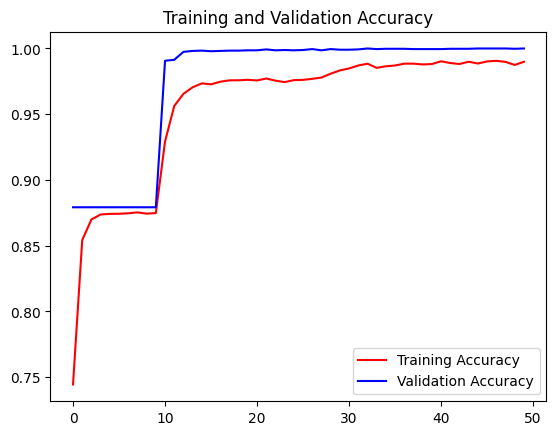

<Figure size 640x480 with 0 Axes>

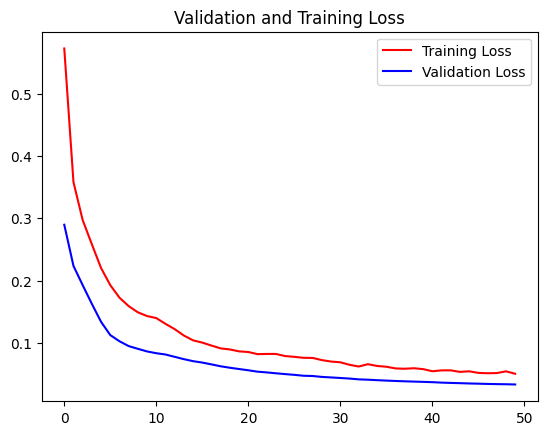

<Figure size 640x480 with 0 Axes>

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Evaluation

In [28]:
# After training your model, access the final values
accuracy = history.history['accuracy'][-1]  # Last training accuracy
loss = history.history['loss'][-1]  # Last training loss
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy
val_loss = history.history['val_loss'][-1]  # Last validation loss

# Print the formatted output
print(f"accuracy: {accuracy:.4f} - loss: {loss:.4f} - val_accuracy: {val_accuracy:.4f} - val_loss: {val_loss:.4f}")

accuracy: 0.9899 - loss: 0.0505 - val_accuracy: 1.0000 - val_loss: 0.0333


In [29]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.04148159548640251
Test accuracy: 1.0


Test Prediction

In [30]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
3662,1.469003,0.461774,1.449083,0.411145,1.437196,0.411351,1.374819,0.428034,1.349009,0.439124,...,1.259715,1.415094,1.423501,1.963864,1.310745,2.027324,1.394551,2.515991,1.267101,2.644077


In [31]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : squat


In [32]:
df_data['class'].unique()

array(['squat', 'other'], dtype=object)

In [33]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [34]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
squat


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 518    0]
 [   0 3771]]


In [37]:
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      4289
   macro avg       1.00      1.00      1.00      4289
weighted avg       1.00      1.00      1.00      4289



135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


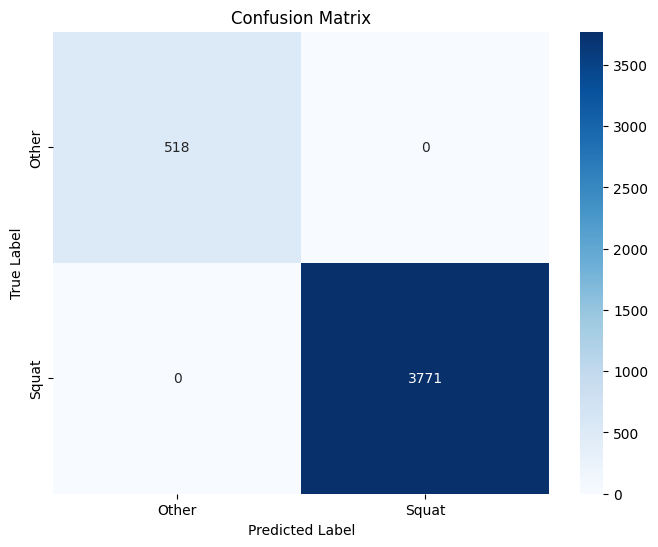

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Prediksi data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Other', 'Squat'], yticklabels=['Other', 'Squat'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

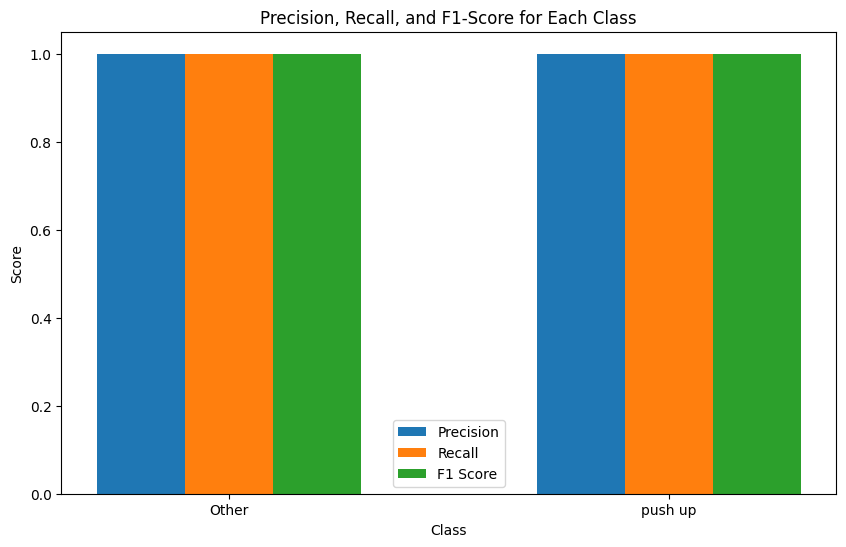

In [39]:
from sklearn.metrics import precision_recall_fscore_support

# Dapatkan metrik precision, recall, dan F1
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes)

# Buat grafik batang
labels = ['Other', 'push up']
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1 Score', align='center')

plt.xticks([p + 0.2 for p in x], labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.legend()
plt.show()

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[ 518    0]
 [   0 3771]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      4289
   macro avg       1.00      1.00      1.00      4289
weighted avg       1.00      1.00      1.00      4289

ROC AUC Score: 1.0


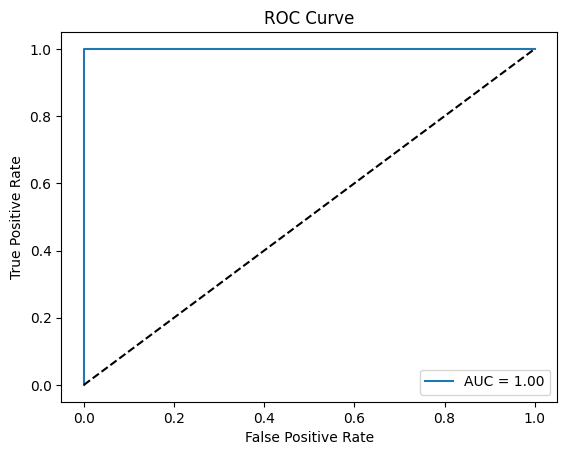

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Pastikan y_test dalam bentuk 1D (jika belum dalam bentuk label, konversi menggunakan argmax)
y_test_classes = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# ROC AUC Score (binary case)
if len(np.unique(y_test_classes)) == 2:  # Pastikan ini kasus biner
    roc_auc = roc_auc_score(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    print("ROC AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print()

Export Model

In [42]:
import tensorflow as tf
from google.colab import files


In [43]:

# 1. Save the model in H5 format
h5_model_file = "model.h5"
model.save(h5_model_file)  # Save the model as H5
print(f"Model saved as {h5_model_file}")

Model saved as model.h5


In [44]:
# 2. Convert the model to TensorFlow Lite
# Load the model back from H5
model_loaded = tf.keras.models.load_model(h5_model_file)

In [45]:
# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_loaded)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimization (optional)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp2cy5_ivx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 34), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  139025124840496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139025124845424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139025125110208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139025125107040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139025125215216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139025125216096: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [46]:
# 3. Save the converted model
tflite_model_file = "model.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)
print(f"Model converted and saved as {tflite_model_file}")

Model converted and saved as model.tflite


In [47]:
# 4. Download both H5 and TFLite models
files.download(h5_model_file)  # Download H5 model
files.download(tflite_model_file)  # Download TFLite model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>